# Import Libraries

In [174]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import pickle

# Reading Data

In [175]:
data = pd.read_csv('/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv')

# Exploratory Data 

In [176]:
# lets check the shape of the dataset

print("Shape of the Dataset:", data.shape)

Shape of the Dataset: (2200, 8)


In [177]:
# lets check the head of the dataset

data.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [178]:
# lets check if there is any missing value present in the dataset

data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [179]:
# check the crops present in this dataset

data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [180]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


In [181]:
# lets check the summary statistics for each of the crops
@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    print("-----------------------------------------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrogen required:", x['N'].min())
    print("Average Nitrogen required:", x['N'].mean())
    print("Maximum Nitrogen required:", x['N'].max())
    print("-----------------------------------------------------------------------")
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous required:", x['P'].min())
    print("Average Phosphorous required:", x['P'].mean())
    print("Maximum Phosphorous required:", x['P'].max())
    print("-----------------------------------------------------------------------")
    print("Statistics for Potassium")
    print("Minimum Potassium required:", x['K'].min())
    print("Average Potassium required:", x['K'].mean())
    print("Maximum Potassium required:", x['K'].max())
    print("-----------------------------------------------------------------------")
    print("Statistics for Temperature")
    print("Minimum Temperature required: {0:.2f}".format(x['temperature'].min()))
    print("Average Temperature required: {0:.2f}".format(x['temperature'].mean()))
    print("Maximum Temperature required: {0:.2f}".format(x['temperature'].max()))
    print("-----------------------------------------------------------------------")
    print("Statistics for Humidity")
    print("Minimum Humidity required: {0:.2f}".format(x['humidity'].min()))
    print("Average Humidity required: {0:.2f}".format(x['humidity'].mean()))
    print("Maximum Humidity required: {0:.2f}".format(x['humidity'].max()))
    print("-----------------------------------------------------------------------")
    print("Statistics for PH")
    print("Minimum PH required: {0:.2f}".format(x['ph'].min()))
    print("Average PH required: {0:.2f}".format(x['ph'].mean()))
    print("Maximum PH required: {0:.2f}".format(x['ph'].max()))
    print("-----------------------------------------------------------------------")
    print("Statistics for Rainfall")
    print("Minimum Rainfall required: {0:.2f}".format(x['rainfall'].min()))
    print("Average Rainfall required: {0:.2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall required: {0:.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [182]:
# lets compare the average requirement for each crops with average conditions

@interact
def compare(conditions = ['N', 'P', 'K', 'temperature', 'ph', 'humidity', 'rainfall']):
    print("Average value for", conditions, "is {0:.2f}".format(data[conditions].mean()))
    print("------------------------------------------------------------------------------")
    print("Rice: {0:.2f}".format(data[(data['label'] == 'rice')][conditions].mean()))
    print("Black Grams: {0:.2f}".format(data[(data['label'] == 'blackgram')][conditions].mean()))
    print("Banana: {0:.2f}".format(data[(data['label'] == 'banana')][conditions].mean()))
    print("Jute: {0:.2f}".format(data[(data['label'] == 'jute')][conditions].mean()))
    print("Coconut: {0:.2f}".format(data[(data['label'] == 'coconut')][conditions].mean()))
    print("Apple: {0:.2f}".format(data[(data['label'] == 'apple')][conditions].mean()))
    print("Papaya: {0:.2f}".format(data[(data['label'] == 'papaya')][conditions].mean()))
    print("Muskmelon: {0:.2f}".format(data[(data['label'] == 'muskmelon')][conditions].mean()))
    print("Grapes: {0:.2f}".format(data[(data['label'] == 'grapes')][conditions].mean()))
    print("Watermelon: {0:.2f}".format(data[(data['label'] == 'watermelon')][conditions].mean()))
    print("Kidney Beans: {0:.2f}".format(data[(data['label'] == 'kidneybeans')][conditions].mean()))
    print("Mung Beans: {0:.2f}".format(data[(data['label'] == 'mungbean')][conditions].mean()))
    print("Oranges: {0:.2f}".format(data[(data['label'] == 'orange')][conditions].mean()))
    print("Chick Peas: {0:.2f}".format(data[(data['label'] == 'chickpea')][conditions].mean()))
    print("Lentils: {0:.2f}".format(data[(data['label'] == 'lentil')][conditions].mean()))
    print("Cotton: {0:.2f}".format(data[(data['label'] == 'cotton')][conditions].mean()))
    print("Maize: {0:.2f}".format(data[(data['label'] == 'maize')][conditions].mean()))
    print("Moth Beans: {0:.2f}".format(data[(data['label'] == 'mothbeans')][conditions].mean()))
    print("Pigeon Peas: {0:.2f}".format(data[(data['label'] == 'pigeonpeas')][conditions].mean()))
    print("Mango: {0:.2f}".format(data[(data['label'] == 'mango')][conditions].mean()))
    print("Pomegranate: {0:.2f}".format(data[(data['label'] == 'pomegranate')][conditions].mean()))
    print("Coffee: {0:.2f}".format(data[(data['label'] == 'coffee')][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [183]:
# lets make this function more intuitive

@interact
def compare(conditions = ['N', 'P', 'K', 'temperature', 'ph', 'humidity', 'rainfall']):
    print("Crops which require greater than average", conditions, '\n')
    print(data[data[conditions] > data[conditions].mean()]['label'].unique())
    print("-----------------------------------------------------------------------------")
    print("Crops which require less than or equal to average", conditions, '\n')
    print(data[data[conditions] <= data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [184]:
#lets find out some interesting facts

print("Some Interesting Patterns")
print("------------------------------------------------------------------------------")
print("Crops which requires very high ratio of Nitrogen in soil:", data[data['N'] > 120]['label'].unique())
print("Crops which requires very high ratio of Phosphorous in soil:", data[data['P'] > 100]['label'].unique())
print("Crops which requires very high ratio of Potassium in soil:", data[data['K'] > 200]['label'].unique())
print("Crops which requires very high Rainfall:", data[data['rainfall'] > 200]['label'].unique())
print("Crops which requires very low Temperature:", data[data['temperature'] < 10]['label'].unique())
print("Crops which requires very high Temperature:", data[data['temperature'] > 40]['label'].unique())
print("Crops which requires very low Humidity:", data[data['humidity'] < 20]['label'].unique())
print("Crops which requires very low pH:", data[data['ph'] < 4]['label'].unique())
print("Crops which requires very high pH:", data[data['ph'] > 9]['label'].unique())

Some Interesting Patterns
------------------------------------------------------------------------------
Crops which requires very high ratio of Nitrogen in soil: ['cotton']
Crops which requires very high ratio of Phosphorous in soil: ['grapes' 'apple']
Crops which requires very high ratio of Potassium in soil: ['grapes' 'apple']
Crops which requires very high Rainfall: ['rice' 'papaya' 'coconut']
Crops which requires very low Temperature: ['grapes']
Crops which requires very high Temperature: ['grapes' 'papaya']
Crops which requires very low Humidity: ['chickpea' 'kidneybeans']
Crops which requires very low pH: ['mothbeans']
Crops which requires very high pH: ['mothbeans']


In [185]:
# lts understand which crops can only be grown in summer season, winter season and rainy season

print("Summer Crops")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("------------------------------------------------------------------------------")
print("Winter Crops")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("------------------------------------------------------------------------------")
print("Rainy Crops")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 50)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
------------------------------------------------------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
------------------------------------------------------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


# Build K-means Model

In [186]:
x = data.drop(['label'], axis = 1)
x = x.values
print(x.shape)

(2200, 7)


# Elbow Method

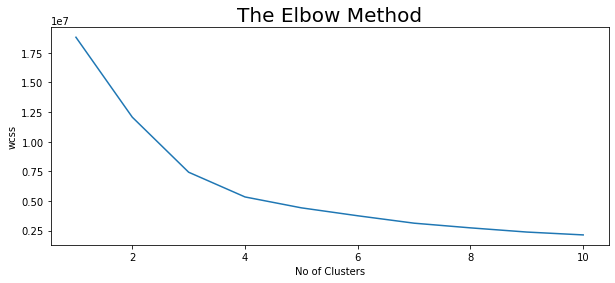

In [187]:
# lets determine the optimum number of clusters within the dataset - group of crops using same conditions

plt.rcParams['figure.figsize'] = (10, 4)

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

# lets plot the results

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show()

In [188]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

# lets find out the results

a = data['label']
y_means = pd.DataFrame(y_means) 
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

# lets check the clusters of each crops

print("Lets check the results after applying the KMeans clustering analysis \n")
print("Crops in First cluster:", z[z['cluster'] == 0]['label'].unique())
print("------------------------------------------------------------------------------")
print("Crops in Second cluster:", z[z['cluster'] == 1]['label'].unique())
print("------------------------------------------------------------------------------")
print("Crops in Third cluster:", z[z['cluster'] == 2]['label'].unique())
print("------------------------------------------------------------------------------")
print("Crops in Fourth cluster:", z[z['cluster'] == 3]['label'].unique())

Lets check the results after applying the KMeans clustering analysis 

Crops in First cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
------------------------------------------------------------------------------
Crops in Second cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
------------------------------------------------------------------------------
Crops in Third cluster: ['grapes' 'apple']
------------------------------------------------------------------------------
Crops in Fourth cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


# Build Classifcation Models

In [189]:
acc = []
model = []
y = data['label']
x = data.drop(['label'], axis = 1)
print("Shape of x:", x.shape,"Shape of y:", y.shape)


Shape of x: (2200, 7) Shape of y: (2200,)


In [190]:
# lets create training and testing sets for validation of results
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
print("The shape of x train:", x_train.shape,"The shape of y train:", y_train.shape)
print("The shape of x test:", x_test.shape,"The shape of y test:", y_test.shape)

The shape of x train: (1540, 7) The shape of y train: (1540,)
The shape of x test: (660, 7) The shape of y test: (660,)


# Decision Tree

In [191]:
# lets create a predictive model

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(x_train,y_train)
predicted_values = DecisionTree.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)
print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  91.21212121212122
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.65      1.00      0.78        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      0.90      0.95        29
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        30
        jute       1.00      0.23      0.37        31
 kidneybeans       1.00      0.81      0.89        26
      lentil       0.88      1.00      0.94        22
       maize       0.71      0.81      0.76        27
       mango       1.00      0.93      0.96        28
   mothbeans       1.00      0.50      0.67        36
    mungbean       0.94      1.00      0.97        29
   muskmelon       0.97      1.00      0.98        30
      orange       1.00      1.00

In [192]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = DecisionTree.predict(data)
print(prediction)

['coffee']


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [193]:
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Naive Bayes

In [194]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train,y_train)
predicted_values = NaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)
print(classification_report(y_test,predicted_values))

Naive Bayes's Accuracy is:  0.9939393939393939
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       1.00      1.00      1.00        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        30
        jute       0.91      0.97      0.94        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      1.00      1.00        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00 

In [195]:
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

In [196]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = NaiveBayes.predict(data)
print(prediction)

['jute']


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


# Random Forest

In [197]:
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

RF's Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.97      0.97      0.97        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        30
        jute       1.00      0.97      0.98        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      1.00      1.00        22
       maize       0.96      1.00      0.98        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      0.97      0.99        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00

In [198]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


['jute']


In [199]:
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# Logistic Regression

In [200]:
LogReg = LogisticRegression(random_state=2)

LogReg.fit(x_train,y_train)

predicted_values = LogReg.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Logistic Regression's Accuracy is:  0.95
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.84      0.87      0.86        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       0.84      0.96      0.90        28
      grapes       1.00      1.00      1.00        30
        jute       0.83      0.94      0.88        31
 kidneybeans       0.96      1.00      0.98        26
      lentil       0.91      0.91      0.91        22
       maize       0.92      0.81      0.86        27
       mango       1.00      1.00      1.00        28
   mothbeans       0.81      0.81      0.81        36
    mungbean       1.00      0.97      0.98        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [201]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
Logprediction = LogReg.predict(data)
print(prediction)

['jute']


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [202]:
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Comparing Between Model

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

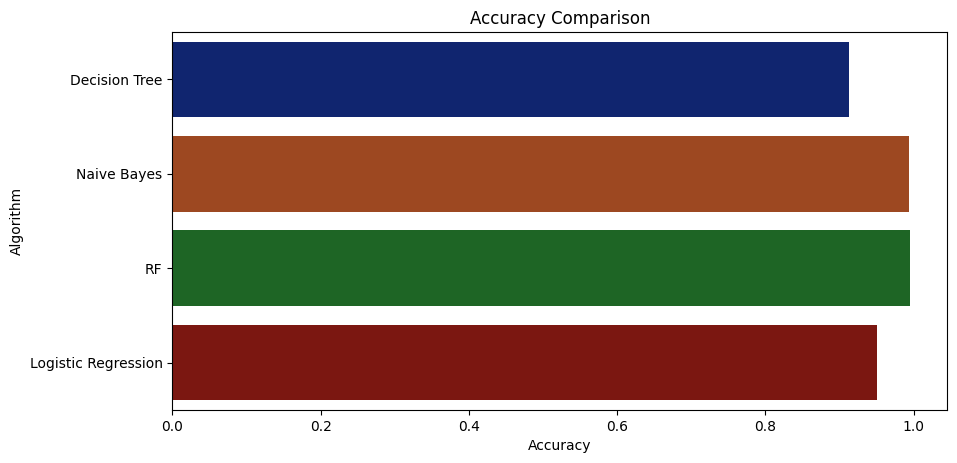

In [203]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [204]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9121212121212121
Naive Bayes --> 0.9939393939393939
RF --> 0.9954545454545455
Logistic Regression --> 0.95
